# Part 1: Data Exploration and Cleaning

## Case Study - Credit Card Dataset

### Goal: Explore and Clean the Data

**Predictive Modeling** 

The goal is to master predictive modeling. In these cases, data is usually stored in tables with features
and a response variable. For example, a house. Its area and number of bedrooms are features, and the cost
of the house is the response variable.

The features are the independent variables while the response/target variable is the dependant variable

If you have a dataset of 1000 houses with the above variables, you have 1000 samples of labeled data.


**Regression Problem**

Once the model is trained to learn the relationship between the features and response through your data,
you can make predictions for houses whose prices you do not know, based on the info in your features.
In this case, the goal is to make a prediction close to the true value of the house. 

Since we are predicting a number on a continuous scale, this is a regression problem


**Classification Problem**

On the other hand, a classification problem is for data sets where the goal is to correctlt predict the 
answer of a Yes/No question such as "will this house go on sale 5 years from now?"


**Summary of Predictive Modeling**

Model + Linked Data = Trained Model 

Regression: New values for features -> Trained regression model -> Numerical prediction

Classification: New values for features -> Trained classification model -> Qualitative prediction

Supervised Learning -> Relies on labeled data: Supervised by the known values of the target variable

Unsupervised Learning -> Relates to more open-ended questions about finding structure on sets without labels

In [2]:
#Load case Study Data with pandas
import pandas as pd
df = pd.read_excel('/home/joseph/python_projects/default_of_credit_card_clients'
                   '__courseware_version_1_21_19.xls') #Reads excel file - path shows Python where it is

In [3]:
df.shape #dimensions of dataset

(30000, 25)

In [5]:
df.describe() #gives stats about the dataframe

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    165760.989333      1.586500      1.833333      1.535900     35.108800   
std     130158.590432      0.513348      0.807699      0.542698      9.851592   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.132867     -0.164333     -0.219300     -0.263900     -0.288033   
std        1.191215      1.191096      1.162348      1.127519      1.144981   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   42791.362167   39884.398167   38480.350933    5613.321500   
std    ...   64090.316188   60606.644833   59406.836932   16539.094312   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2034.000000    1534.000000    1080.000000     836.000000   
50%    ...   18759.500000   17835.500000   16643.000000    2084.500000   
75%    ...   53572.250000   49804.000000   48863.500000    5000.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   5.855410e+03    5174.387967    4776.089733    4754.749200   
std    2.299256e+04   17565.538305   15532.893047   15239.070708   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    7.217500e+02     371.000000     223.000000     170.750000   
50%    2.000000e+03    1776.000000    1500.000000    1500.000000   
75%    5.000000e+03    4500.000000    4000.000000    4000.000000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5164.223267                    0.218733  
std     17712.664703                    0.413394  
min         0.000000                    0.000000  
25%         9.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 23 columns]

In [6]:
df #shows the dataframe

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24     2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2      85698822-43f5      90000    2          2         2   34     0      0   
3      0737c11b-be42      50000    2          2         1   37     0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57    -1      0   
...              ...        ...  ...        ...       ...  ...   ...    ...   
29995  ecff42d0-bdc6     220000    1          3         1   39     0      0   
29996  99d1fa0e-222b     150000    1          3         2   43    -1     -1   
29997  95cdd3e7-4f24      30000    1          2         2   37     4      3   
29998  00d03f02-04cd      80000    1          3         1   41     1     -1   
29999  15d69f9f-5ad3      50000    1          2         1   46     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1     -1  ...          0          0          0         0       689   
1          0      0  ...       3272       3455       3261         0      1000   
2          0      0  ...      14331      14948      15549      1518      1500   
3          0      0  ...      28314      28959      29547      2000      2019   
4         -1      0  ...      20940      19146      19131      2000     36681   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...      88004      31237      15980      8500     20000   
29996     -1     -1  ...       8979       5190          0      1837      3526   
29997      2     -1  ...      20878      20582      19357         0         0   
29998      0      0  ...      52774      11855      48944     85900      3409   
29999      0      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [7]:
df.columns #learn column names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
df.head() #show first 5 rows of dataframe

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0  798fc410-45c1      20000    2          2         1   24     2      2   
1  8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2  85698822-43f5      90000    2          2         2   34     0      0   
3  0737c11b-be42      50000    2          2         1   37     0      0   
4  3b7f77cc-dbc0      50000    1          2         1   57    -1      0   

   PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1     -1  ...          0          0          0         0       689   
1      0      0  ...       3272       3455       3261         0      1000   
2      0      0  ...      14331      14948      15549      1518      1500   
3      0      0  ...      28314      28959      29547      2000      2019   
4     -1      0  ...      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0         0                           1  
1      1000      1000         0      2000                           1  
2      1000      1000      1000      5000                           0  
3      1200      1100      1069      1000                           0  
4     10000      9000       689       679                           0  

[5 rows x 25 columns]

In [9]:
df['ID'].nunique() #show unique values in ID. nunique = Unique Numbers

29687

In [10]:
id_counts = df['ID'].value_counts() #Stores values of ID as a variable - Similar to group by/count in SQL
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

In [11]:
id_counts.value_counts() #Shows unique counts and duplicate counts. In this case, no ID occurs more than twice.

1    29374
2      313
Name: ID, dtype: int64

In [12]:
#Use boolean masks to clean case study data. Boolean masks filter the array by some condition

dupe_mask = id_counts == 2 #The condition is duplicate coubts in the dataframe
dupe_mask[0:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [13]:
id_counts.index[0:5] #Access index of id_count and display the first 5 rows as context

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

In [14]:
dupe_ids = id_counts.index[dupe_mask] #Store duplicated IDs as a variable

In [15]:
#Convert to list
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [16]:
dupe_ids[0:5] #Verify 

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [17]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:] #Display Duplicate values

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
5033   89f8f447-fca8     320000    2          2         1   32     0      0   
5133   89f8f447-fca8          0    0          0         0    0     0      0   
16727  1fb3e3e6-a68d      80000    1          2         2   33     2      2   
16827  1fb3e3e6-a68d          0    0          0         0    0     0      0   
29685  ad23fe5c-7b09      50000    1          3         1   32     0      0   
29785  ad23fe5c-7b09          0    0          0         0    0     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
5033       0      0  ...     169371     172868     150827      8000      8000   
5133       0      0  ...          0          0          0         0         0   
16727      0      0  ...      27394      29922      31879         0      2000   
16827      0      0  ...          0          0          0         0         0   
29685      0      0  ...      12882       8131       3983      3000      2871   
29785      0      0  ...          0          0          0         0         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
5033       5500      6100      6000      5000                           0  
5133          0         0         0         0                           0  
16727      2000      3000      2600         0                           1  
16827         0         0         0         0                           0  
29685      1000       163      3983      3771                           1  
29785         0         0         0         0                           0  

[6 rows x 25 columns]

In [18]:
#There is one row with data and one row full of zeros for each duplicate. Delete the rows with all zeroes.

df_zero_mask = df == 0 #Boolean matrix the size of the entire Dataframe

#Goal is to create a Boolean Series called feature_zero_mask to identify the rows with all zeroes.
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1) #Integer locating all columns from index 1 that have zeroes

In [19]:
sum(feature_zero_mask) #315 rows have zeroes for every column but the first one

315

In [20]:
#Clean the dataframe
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1.shape

(29685, 25)

In [21]:
#Unique IDs in clean dataframe
df_clean_1['ID'].nunique()

29685

In [22]:
#Save data
df_clean_1.to_csv('/home/joseph/python_projects/df_clean_1.csv', index=False)

In [23]:
df_clean_1.info() #Why is PAY_1 an object while the other PAY columns are integers?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [24]:
df_clean_1['PAY_1'].head() #Zero is not documented in the data directory

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [25]:
df_clean_1['PAY_1'].value_counts() #"Not Available" is why this column was imported as object instead of int64

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [26]:
#Use a logical mask to find the rows that do not have missing data for PAY_1
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [27]:
sum(valid_pay_1_mask) #Number of rows without "Not Available" in PAY_1 column

26664

In [30]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy() #Clean data by removing rows with "Not Available"

In [31]:
df_clean_2.shape

(26664, 25)

In [32]:
df_clean_2['PAY_1'].value_counts() #Verify that the "Not Available" rows have been removed

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [33]:
#Make the PAY_1 column int64
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64') #.astype changes it from object to int64
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [34]:
#Save cleaned dataframe
df_clean_2.to_csv('/home/joseph/python_projects/df_clean_2.csv', index=False)

### Data Quality Assurance and Exploration

In [36]:
#Explore Data with the credit limit and age features of our dataset

import matplotlib.pyplot as plt
%matplotlib inline 
#render plotting automatically
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

In [37]:
df_clean_2

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24      2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2      85698822-43f5      90000    2          2         2   34      0      0   
3      0737c11b-be42      50000    2          2         1   37      0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
...              ...        ...  ...        ...       ...  ...    ...    ...   
29995  ecff42d0-bdc6     220000    1          3         1   39      0      0   
29996  99d1fa0e-222b     150000    1          3         2   43     -1     -1   
29997  95cdd3e7-4f24      30000    1          2         2   37      4      3   
29998  00d03f02-04cd      80000    1          3         1   41      1     -1   
29999  15d69f9f-5ad3      50000    1          2         1   46      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1     -1  ...          0          0          0         0       689   
1          0      0  ...       3272       3455       3261         0      1000   
2          0      0  ...      14331      14948      15549      1518      1500   
3          0      0  ...      28314      28959      29547      2000      2019   
4         -1      0  ...      20940      19146      19131      2000     36681   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...      88004      31237      15980      8500     20000   
29996     -1     -1  ...       8979       5190          0      1837      3526   
29997      2     -1  ...      20878      20582      19357         0         0   
29998      0      0  ...      52774      11855      48944     85900      3409   
29999      0      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[26664 rows x 25 columns]

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

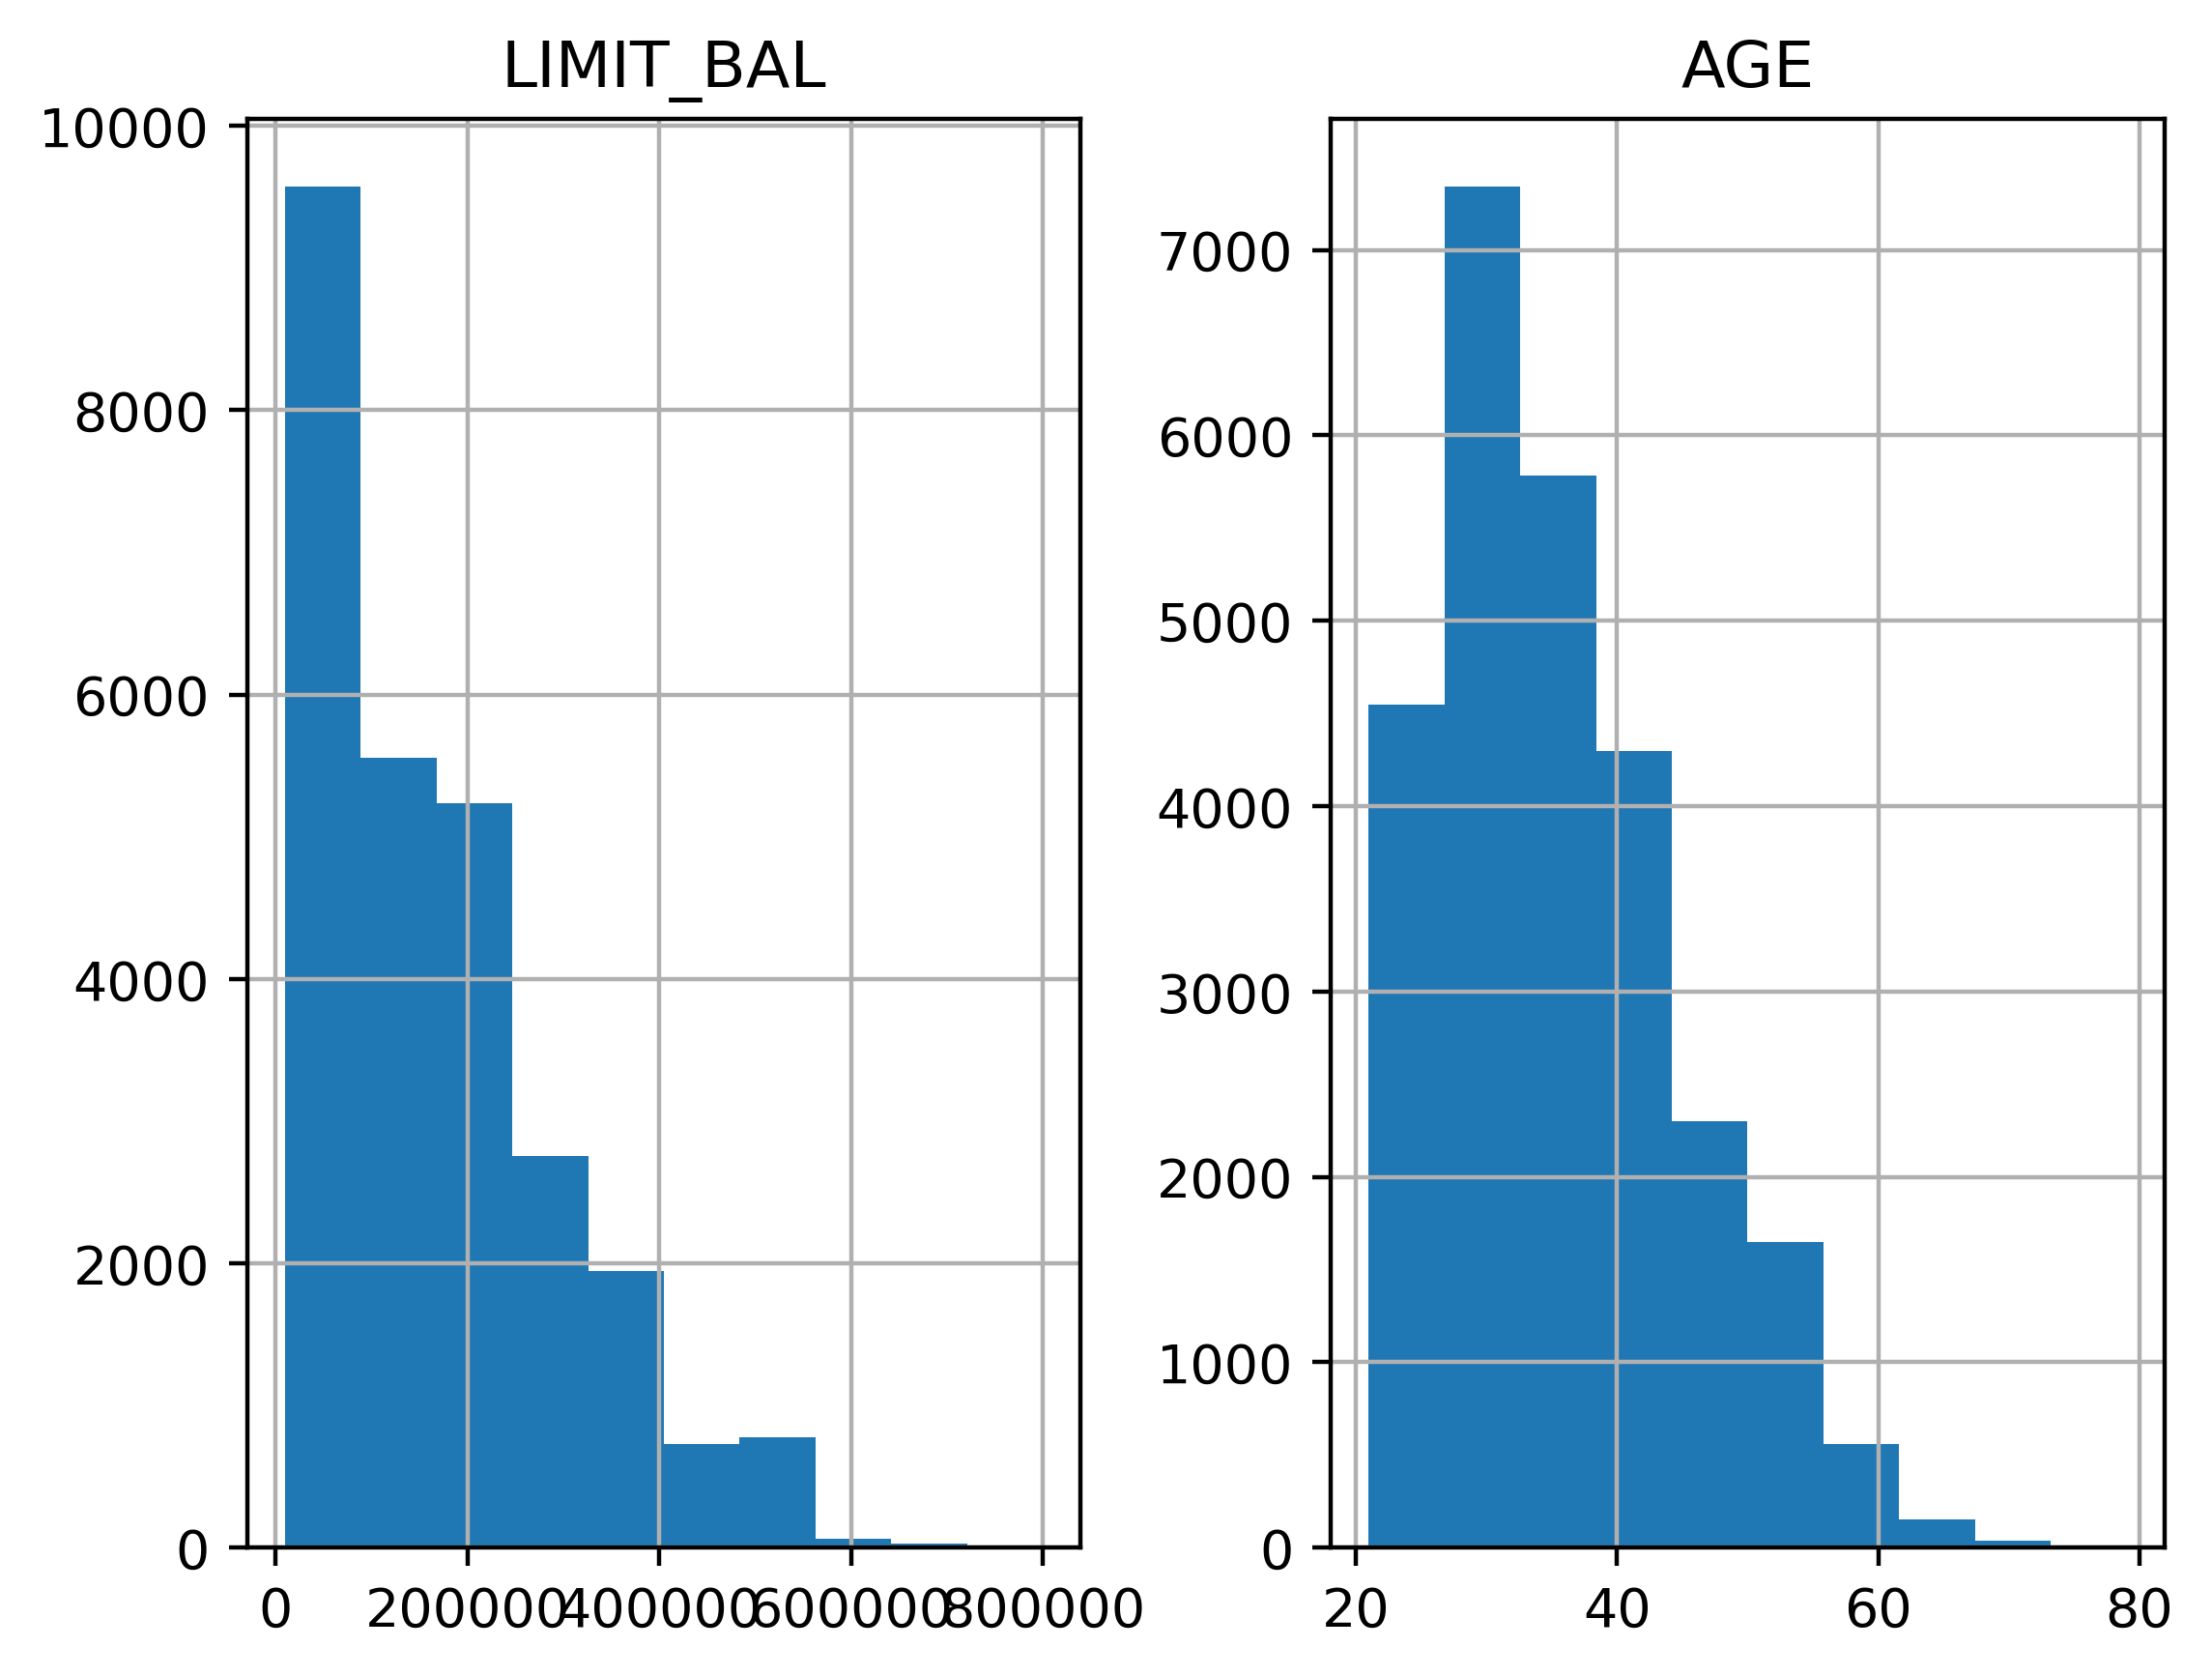

In [38]:
#Initial Histograms
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [39]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe() #Generate tabular report

LIMIT_BAL           AGE
count   26664.000000  26664.000000
mean   167919.054905     35.505213
std    129839.453081      9.227442
min     10000.000000     21.000000
25%     50000.000000     28.000000
50%    140000.000000     34.000000
75%    240000.000000     41.000000
max    800000.000000     79.000000

In [40]:
df_clean_2['EDUCATION'].value_counts() #0, 5, and 6 are undocumented levels of eductaion - put into Others category.

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [41]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],value=4, inplace=True) #Changes the existing dataframe
#Add 0, 5, and 6 into the Others category for EDUCATION
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [42]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [43]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [44]:
df_clean_2.to_csv('/home/joseph/python_projects/df_clean_2_01.csv', index=False)

### Deep Dive: Categorical Features

Text(0.5, 0, 'Education level: ordinal encoding')

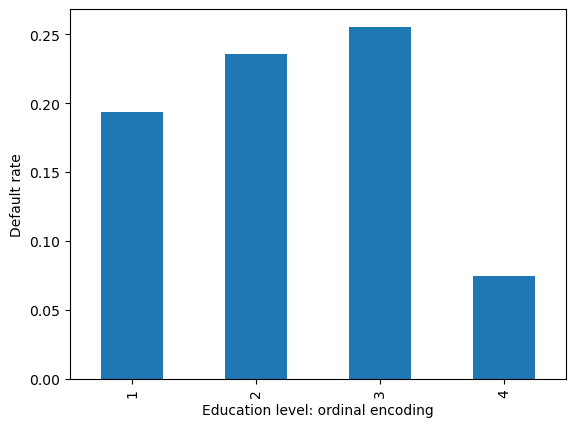

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean_2 = pd.read_csv('/home/joseph/python_projects/df_clean_2_01.csv')
df_clean_2.groupby('EDUCATION').agg({'default payment next '\
'month':'mean'})\
.plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [2]:
#A straight-line fit is not the best idea here. One-hot encoding (OHE) is a simple solution for this case.
#OHE is a way to turn categorical features into numerical features.

import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

df_clean_2['EDUCATION_CAT'] = 'none' # create an empty column
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10) #First 10 rows of Education and new empty column

EDUCATION EDUCATION_CAT
0          2          none
1          2          none
2          2          none
3          2          none
4          2          none
5          1          none
6          1          none
7          2          none
8          3          none
9          3          none

In [4]:
#Create a dictionary and use .map function to fill EDUCATION_CAT column
cat_mapping = {1: "graduate school",2: "university",3: "high school",4: "others"} #dictionary


df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping) #Map EDUCATION_CAT column
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10) #First 10 rows of Education and Categorical Education columns

EDUCATION    EDUCATION_CAT
0          2       university
1          2       university
2          2       university
3          2       university
4          2       university
5          1  graduate school
6          1  graduate school
7          2       university
8          3      high school
9          3      high school

In [5]:
#We are now ready to use OHE - pass the dataframe to the pd.get_dummies() function
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

graduate school  high school  others  university
0                0            0       0           1
1                0            0       0           1
2                0            0       0           1
3                0            0       0           1
4                0            0       0           1
5                1            0       0           0
6                1            0       0           0
7                0            0       0           1
8                0            1       0           0
9                0            1       0           0

In [6]:
#Add OHE dataframe to main dataframe
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1) #concat does the adding
df_with_ohe[['EDUCATION_CAT', 'graduate school','high school', 'university', 'others']].head(10)

EDUCATION_CAT  graduate school  high school  university  others
0       university                0            0           1       0
1       university                0            0           1       0
2       university                0            0           1       0
3       university                0            0           1       0
4       university                0            0           1       0
5  graduate school                1            0           0       0
6  graduate school                1            0           0       0
7       university                0            0           1       0
8      high school                0            1           0       0
9      high school                0            1           0       0

In [7]:
df_with_ohe.to_csv('/home/joseph/python_projects/Chapter_1_cleaned_data.csv', index=False) #save CSV

### Exploring Financial History Features in Dataset

In [11]:
df = pd.read_csv('/home/joseph/python_projects/Chapter_1_cleaned_data.csv')

#Investigate financial history features
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  26664.000000  26664.000000  26664.000000  26664.000000  26664.000000   
mean      -0.017777     -0.133363     -0.167679     -0.225023     -0.269764   
std        1.126769      1.198640      1.199165      1.167897      1.131735   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  26664.000000  
mean      -0.293579  
std        1.150229  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [12]:
df[pay_feats[0]].value_counts().sort_index() #Look at Pay_1 again

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

Text(0, 0.5, 'Number of accounts')

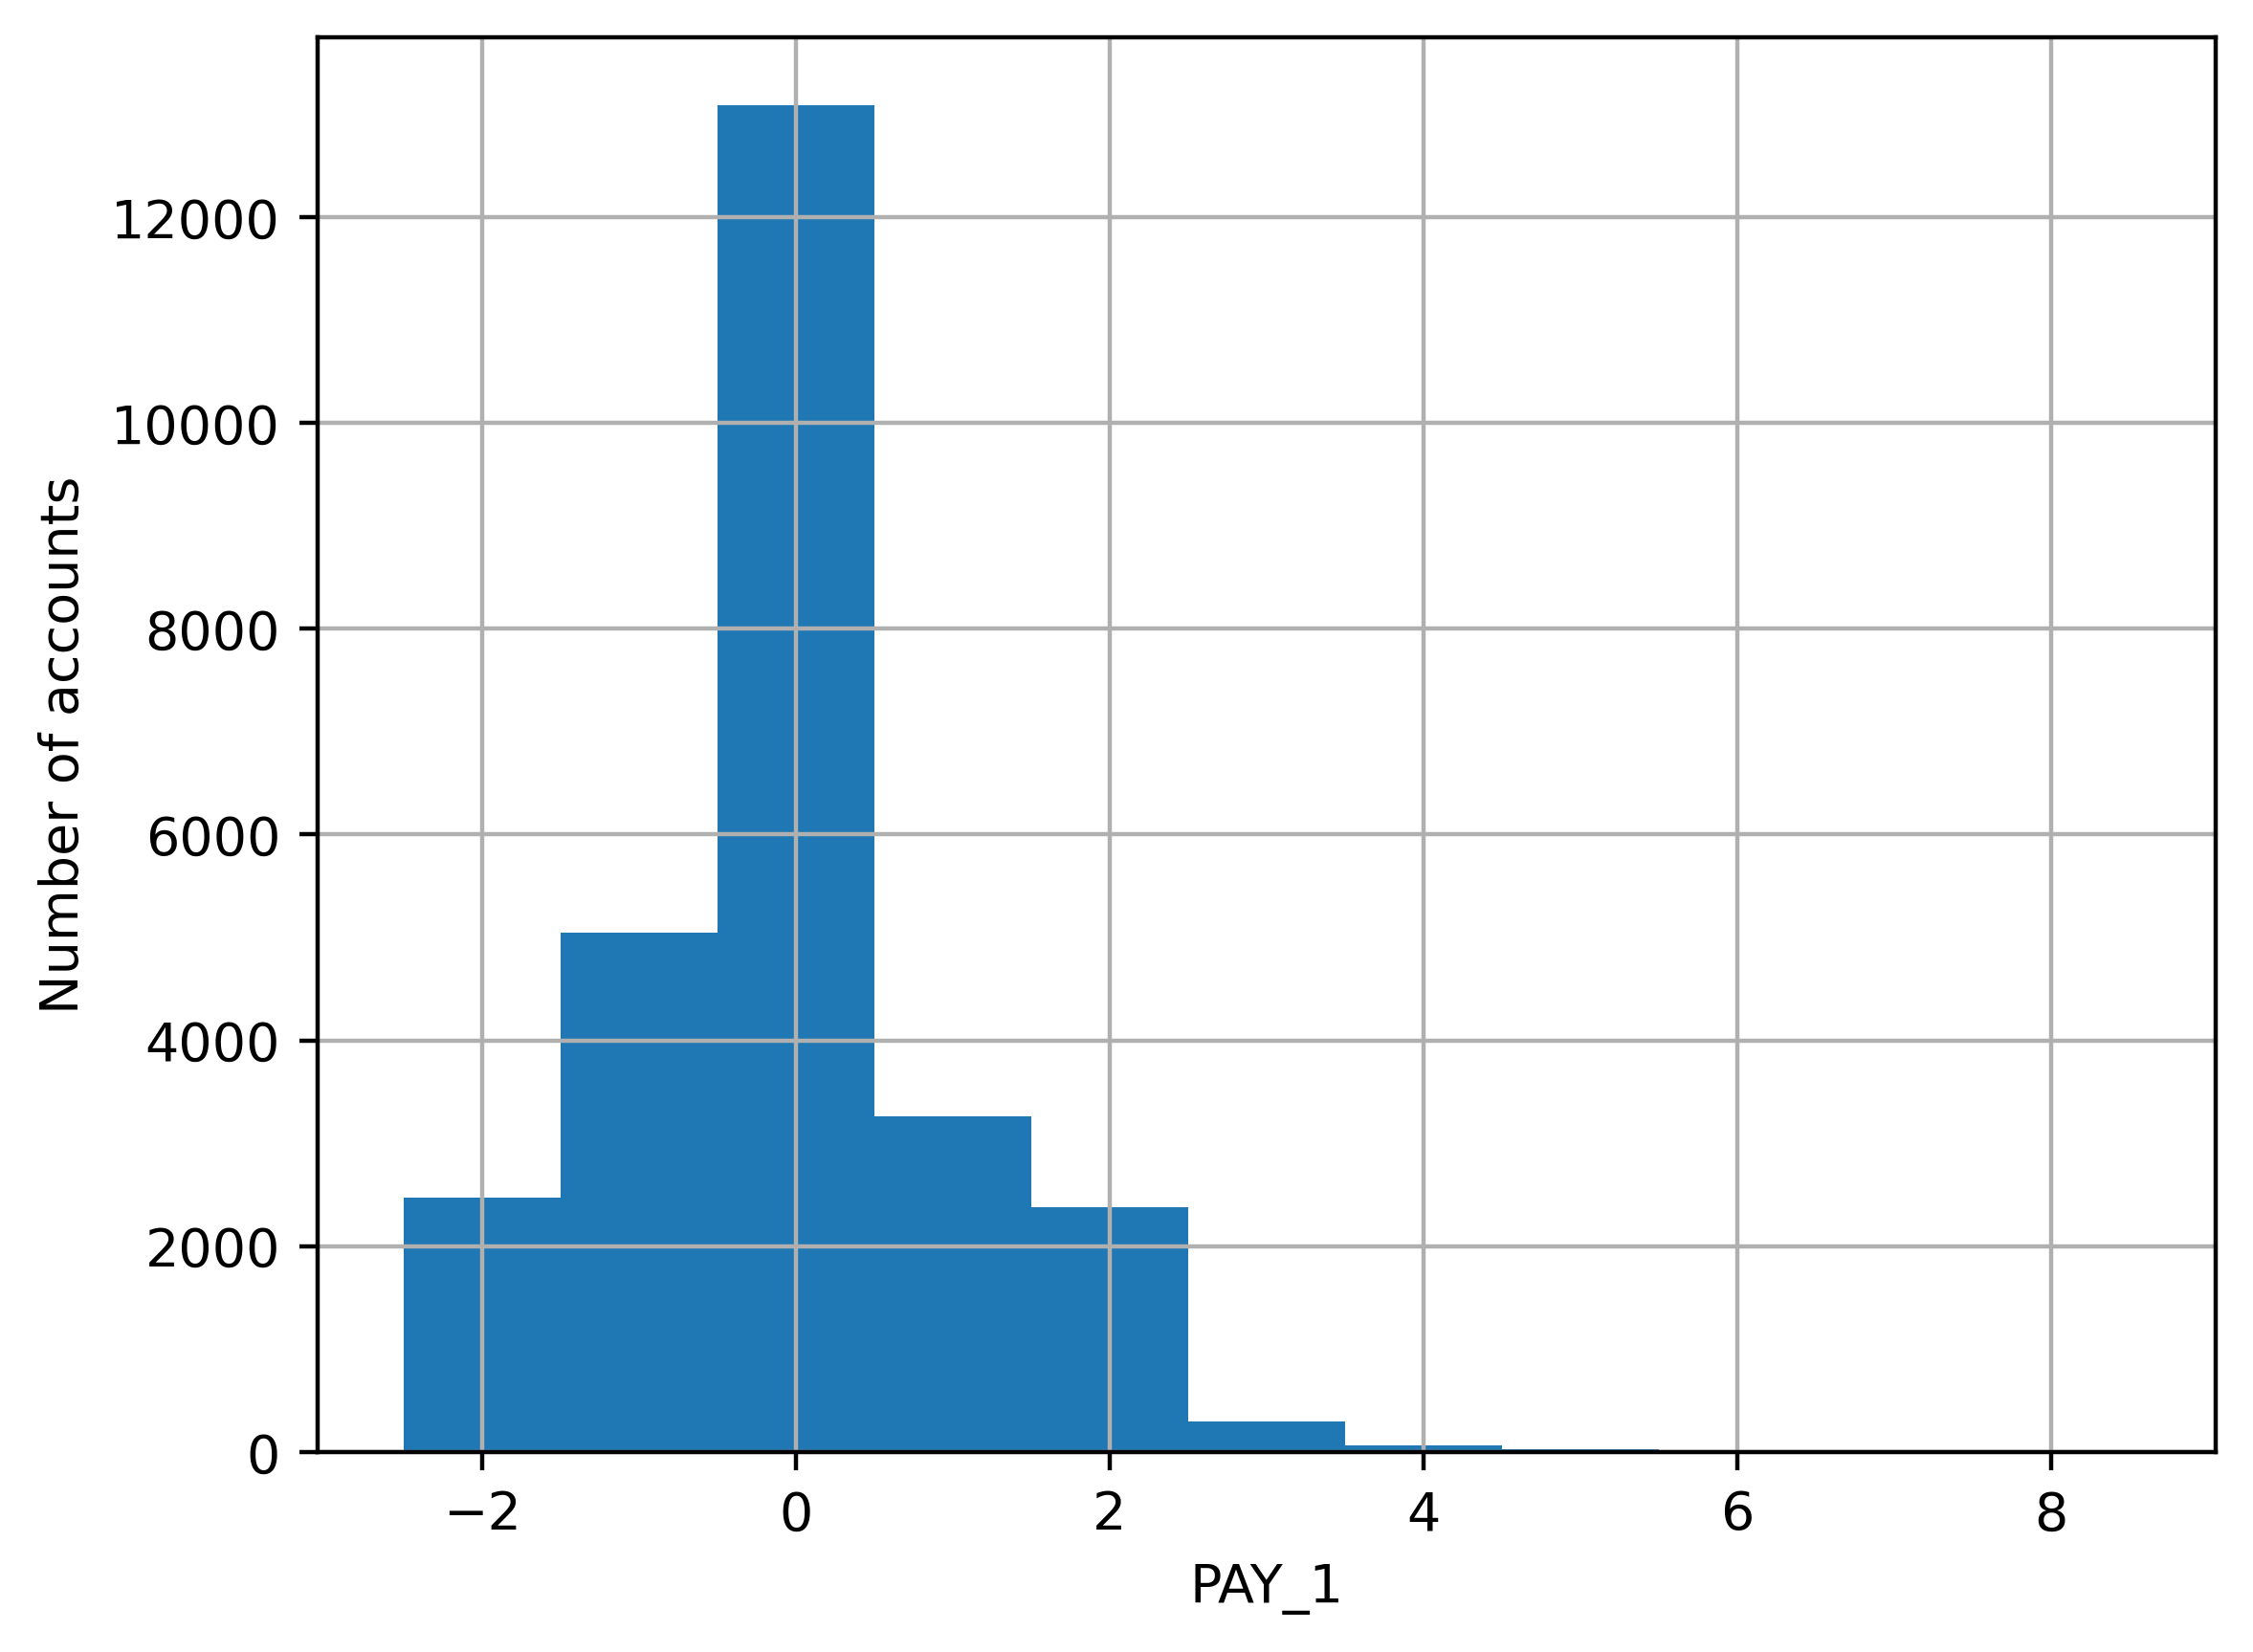

In [14]:
import numpy as np

pay_1_bins = np.array(range(-2,10)) - 0.5 #redefine bin edges of histogram because default is 10 and we need 11
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

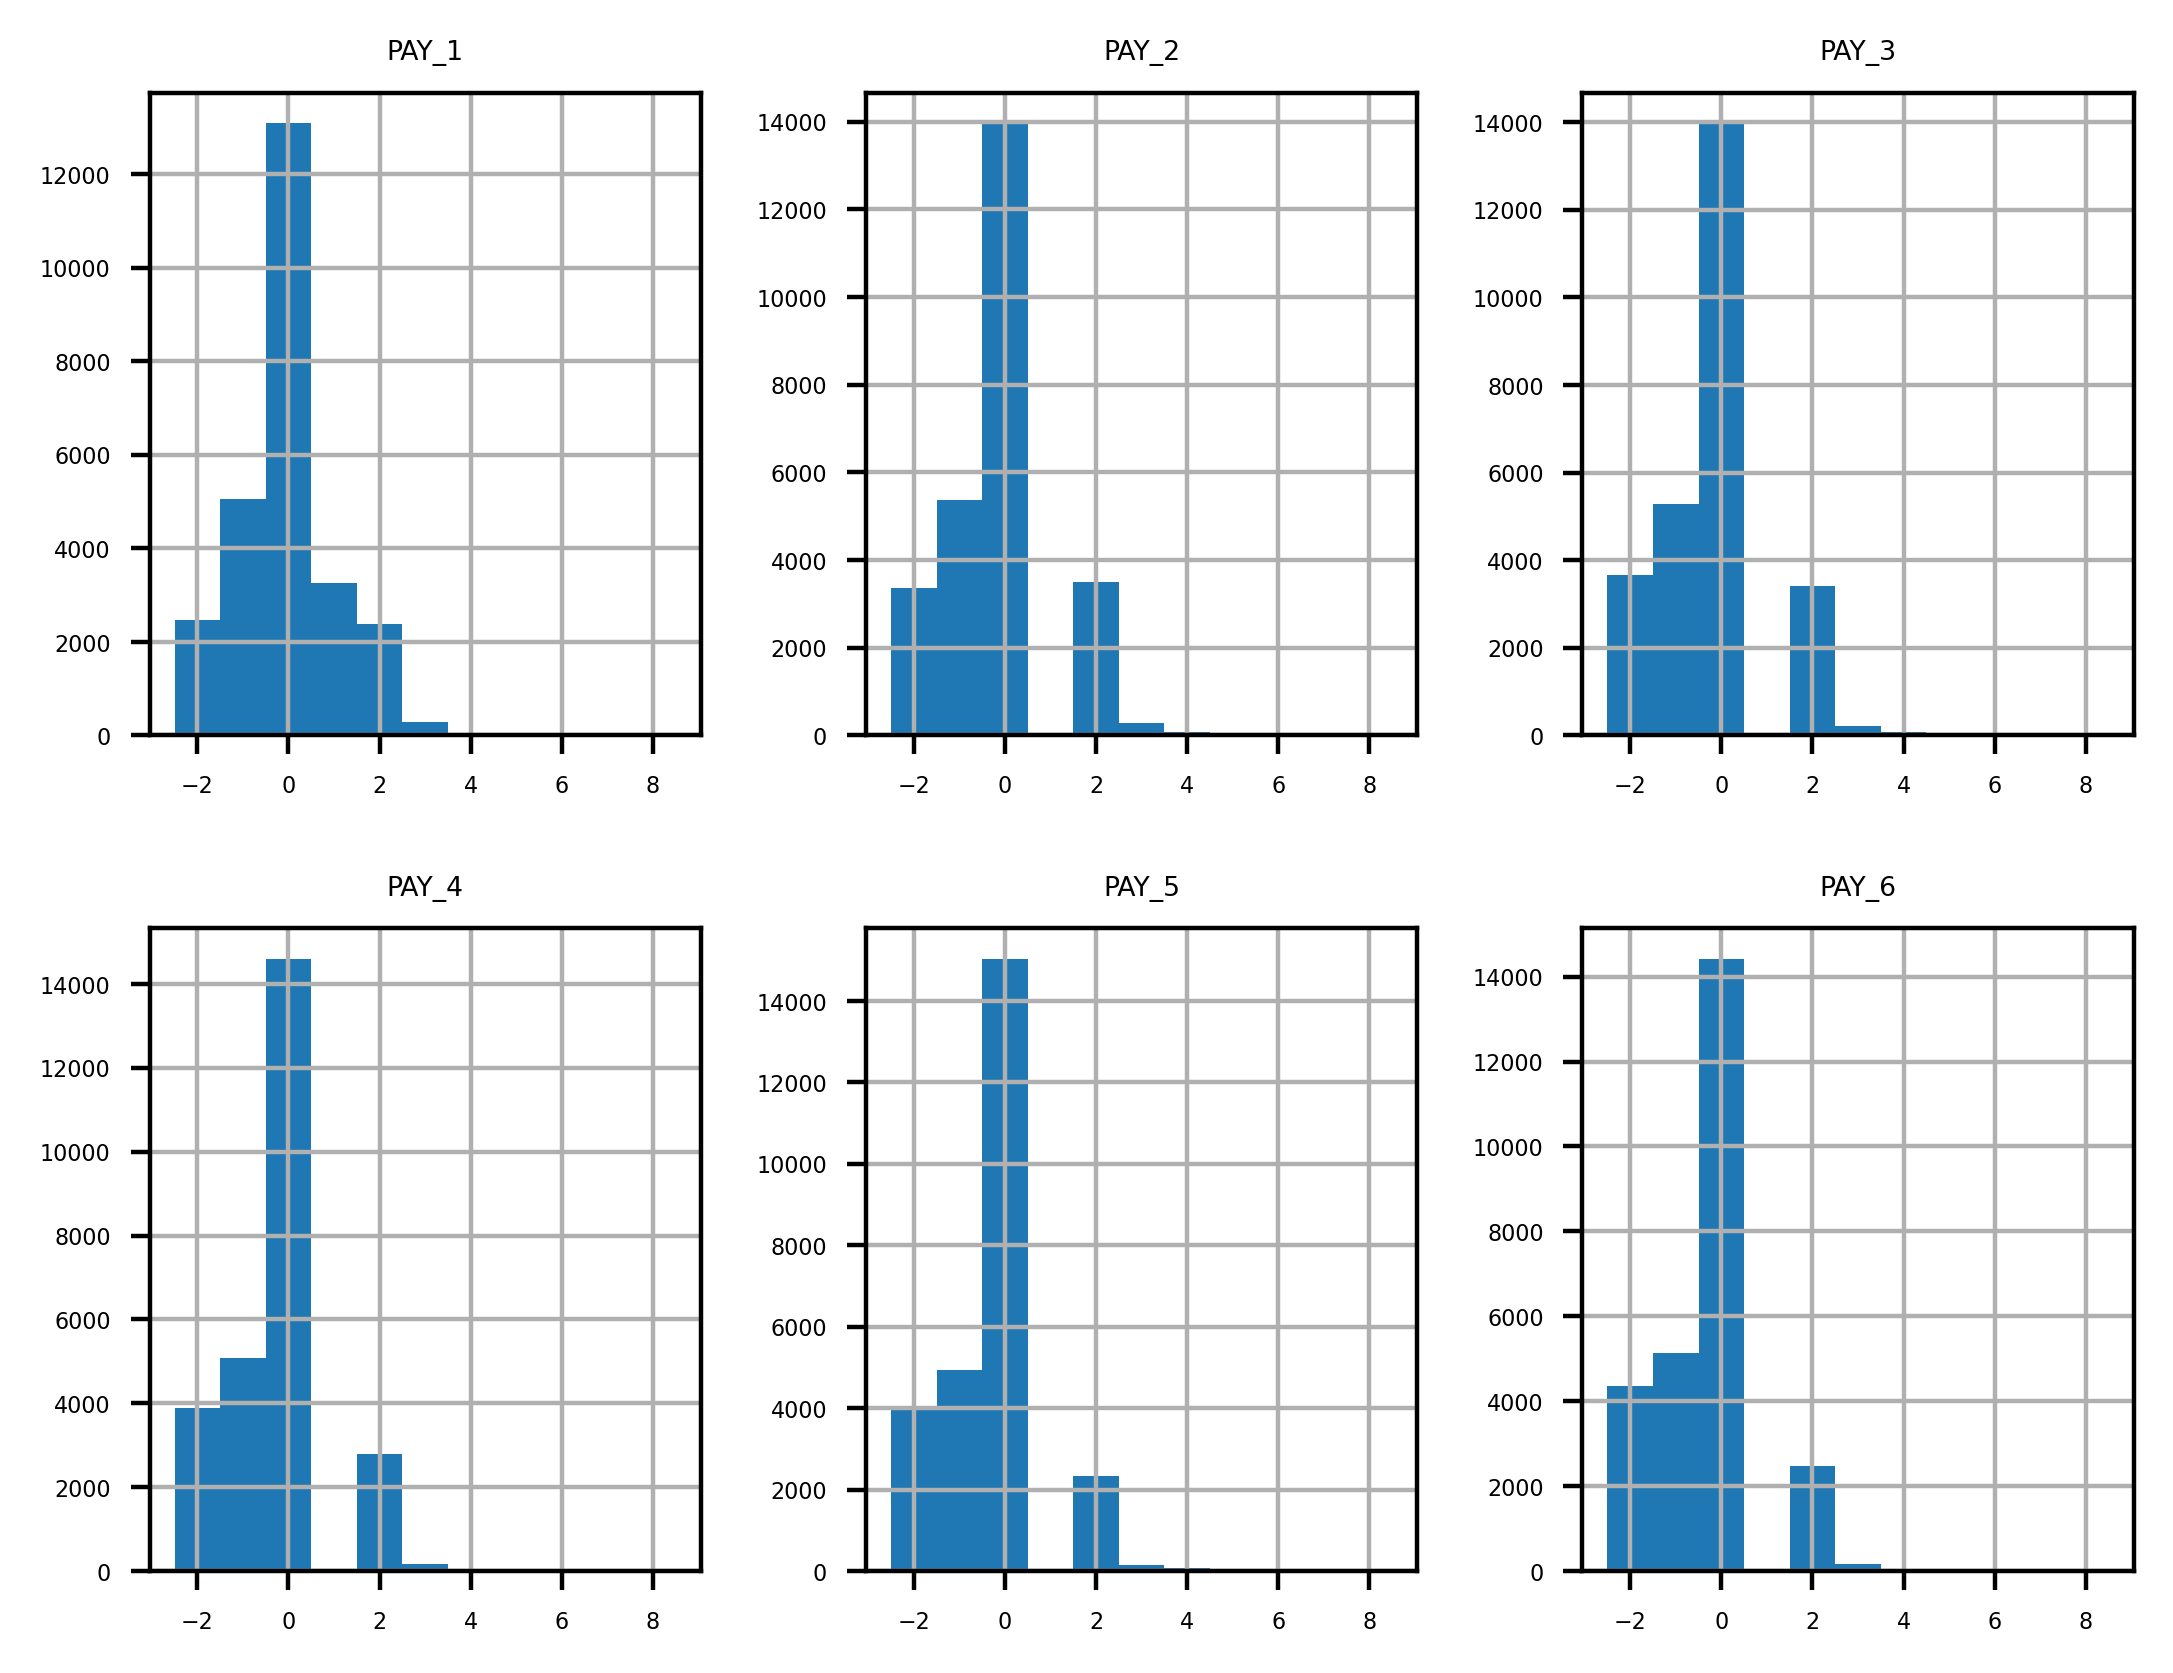

In [15]:
#Now, let's use Pandas to plot multiple histograms together - representing the last 6 months

mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [16]:
#Something does not seem right. There is a HUGE increase in the 1 month-delay between Jul and Aug. Must investigate
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head() #Look at Aug values with 2 month delay

PAY_2  PAY_3
0       2     -1
1       2      0
13      2      2
15      2      0
47      2      2

Nonsensical values in July column (PAY_3). Check logic in query used to make dataset or contact person who gave the  set. After contacting, we learn hat there were issues for reporting accounts with 1-month delays in payments. Hence the value of 1 being underreported in all months except for September (which we had to fix as well) Due to this, only PAY_1 is representative of future data. Quality of data is important.

### Activity: Explore the remaining financial features in the dataset

In [18]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['font.size'] = 4 #font size for figures
from scipy import stats
import numpy as np
df = pd.read_csv('/home/joseph/python_projects/Chapter_1_cleaned_data.csv')

In [19]:
#Create Lisrs of feature names for remaining financial features


bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [20]:
df[bill_feats].describe() #Statistical summary of bill features

BILL_AMT1      BILL_AMT2      BILL_AMT3      BILL_AMT4  \
count   26664.000000   26664.000000   26664.000000   26664.000000   
mean    51405.730723   49300.001500   47026.340047   43338.894539   
std     73633.687106   70934.549534   68705.359524   64275.250740   
min   -165580.000000  -69777.000000 -157264.000000 -170000.000000   
25%      3580.000000    2999.750000    2627.250000    2341.750000   
50%     22361.000000   21150.000000   20079.500000   19037.000000   
75%     67649.750000   64395.500000   60360.000000   54727.500000   
max    746814.000000  671563.000000  855086.000000  706864.000000   

           BILL_AMT5      BILL_AMT6  
count   26664.000000   26664.000000  
mean    40338.136701   38889.872337  
std     60705.944083   59432.541657  
min    -81334.000000 -339603.000000  
25%      1745.000000    1256.000000  
50%     18066.000000   17005.000000  
75%     50290.500000   49253.750000  
max    823540.000000  699944.000000

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

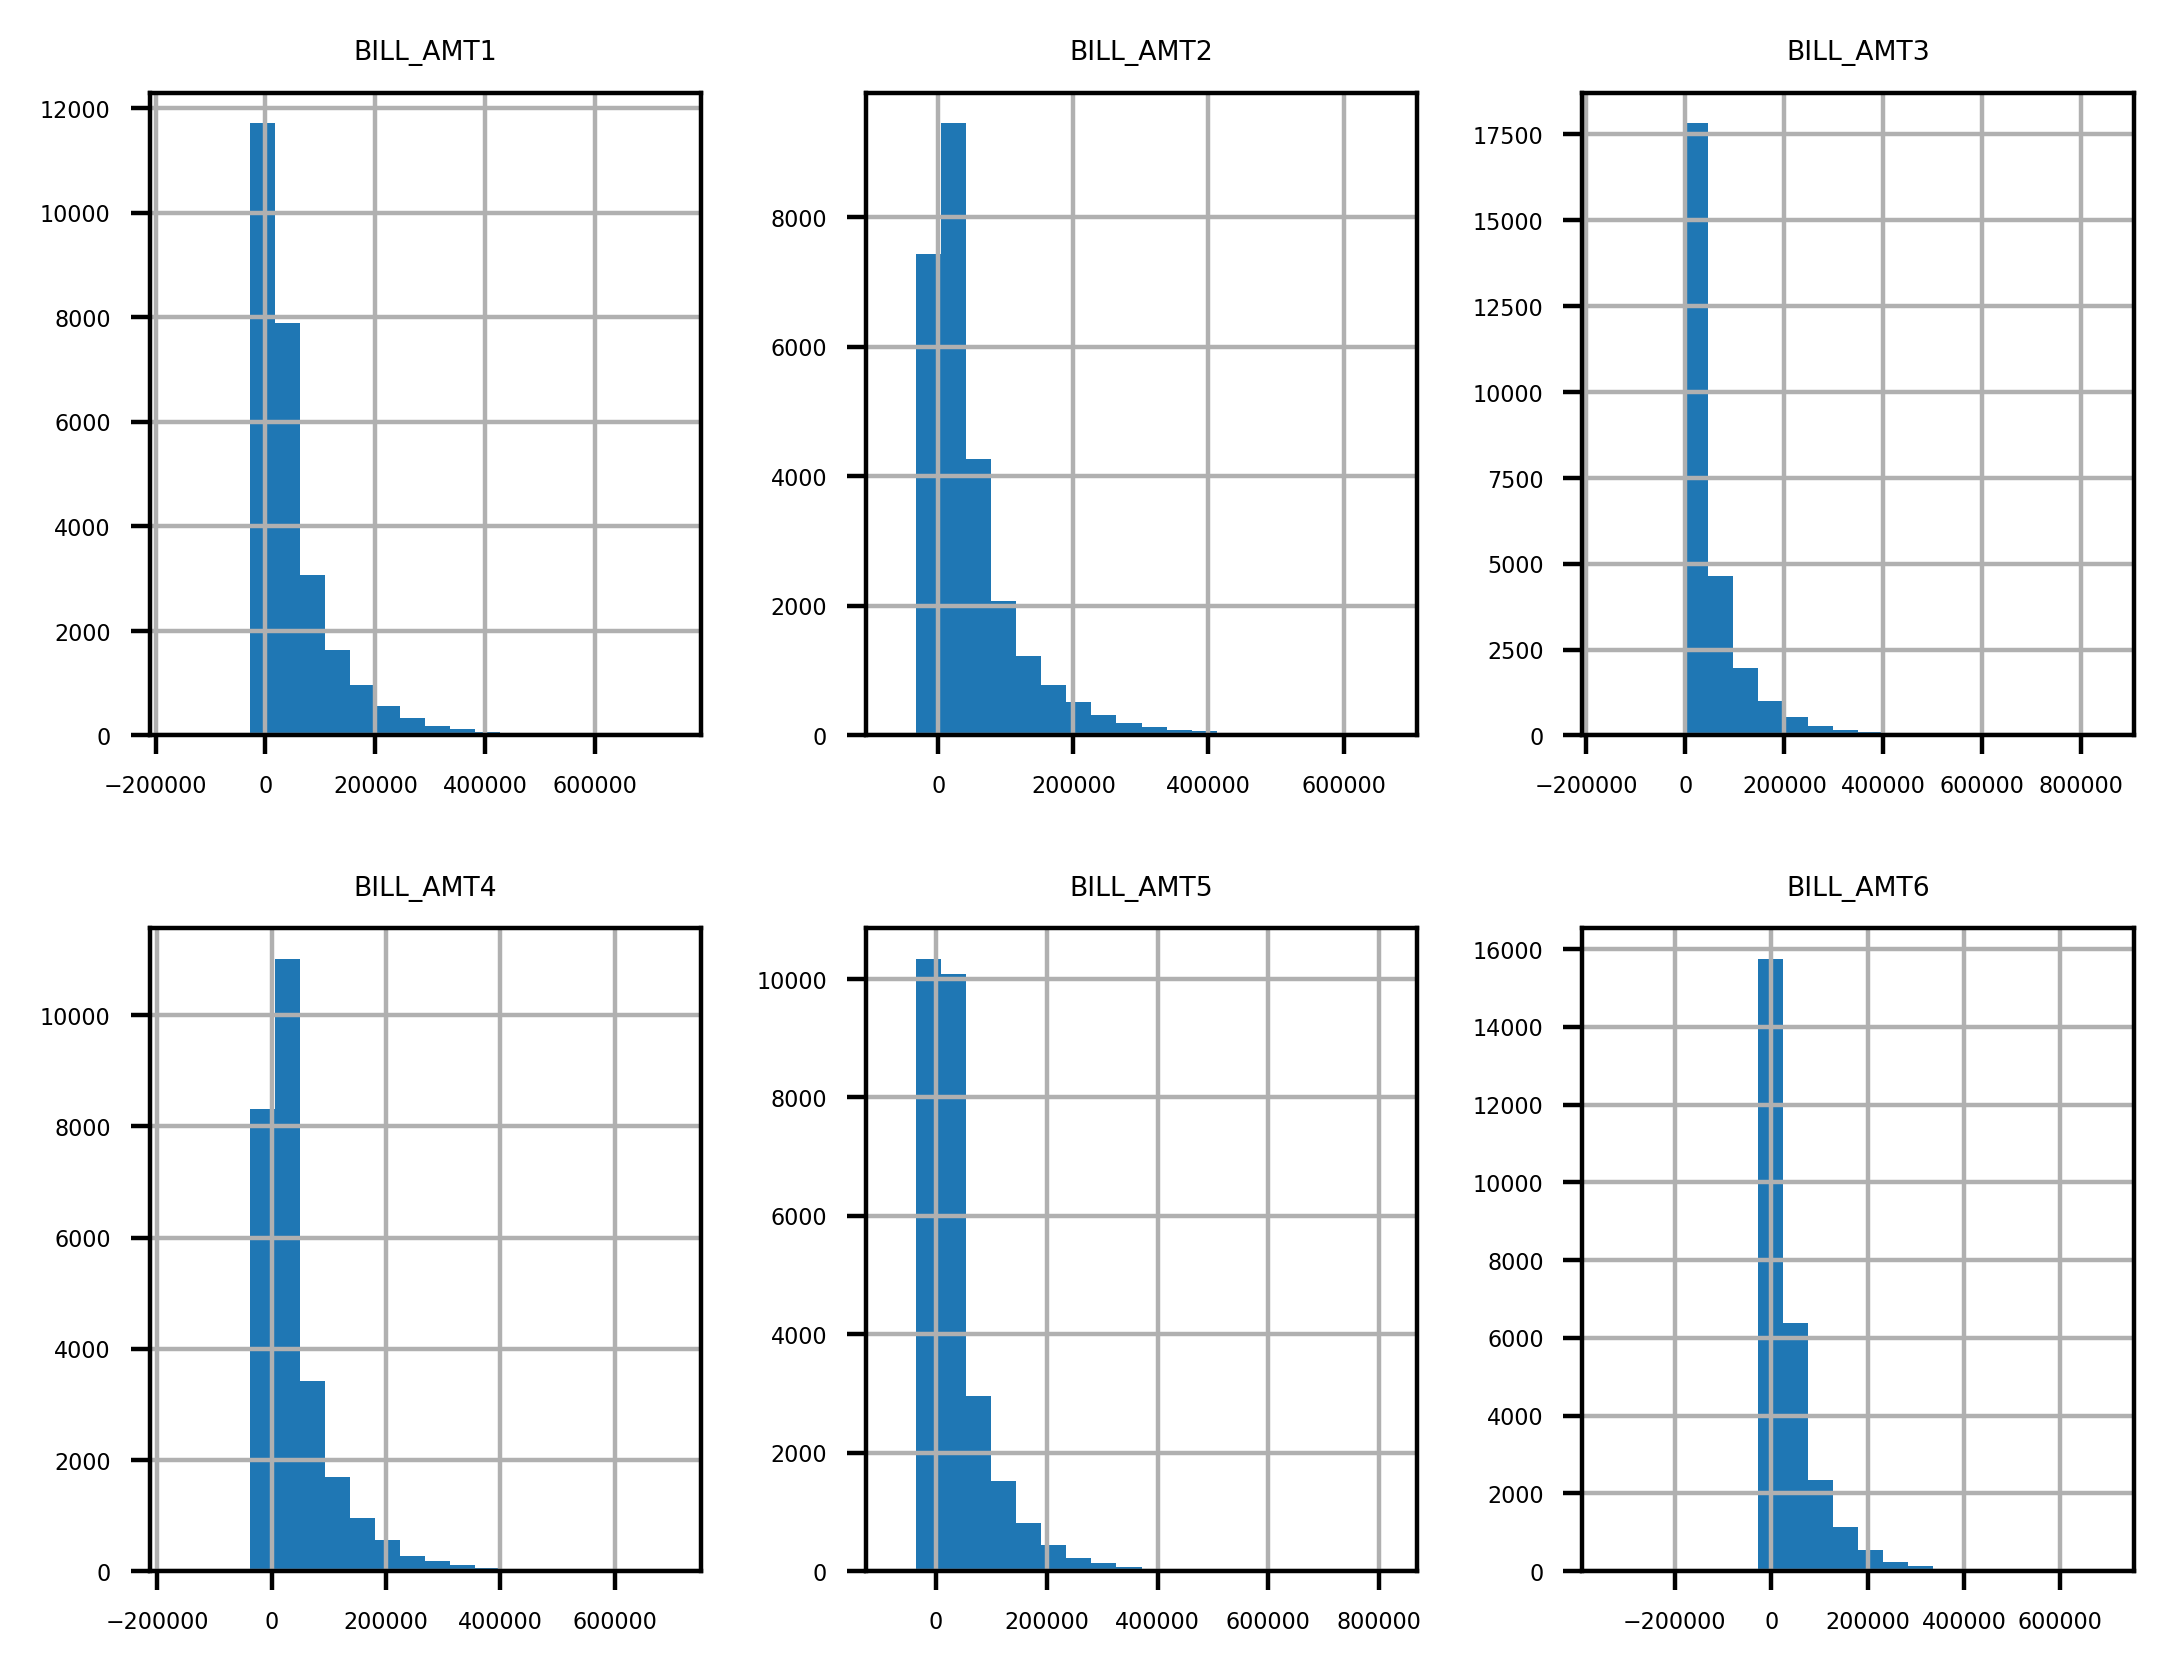

In [21]:
#Histogram of bill features
df[bill_feats].hist(bins = 20,layout = (2,3))

In [22]:
df[pay_amt_feats].describe() #statistical summary

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   26664.000000  2.666400e+04   26664.000000   26664.000000   
mean     5704.085771  5.881110e+03    5259.514964    4887.048717   
std     16699.398632  2.121431e+04   17265.439561   15956.349371   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.020000e+02     390.000000     294.750000   
50%      2114.500000  2.007000e+03    1822.000000    1500.000000   
75%      5027.000000  5.000000e+03    4556.250000    4050.500000   
max    873552.000000  1.227082e+06  889043.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   26664.000000   26664.000000  
mean     4843.729973    5257.843047  
std     15311.721795   17635.468185  
min         0.000000       0.000000  
25%       242.750000     111.000000  
50%      1500.000000    1500.000000  
75%      4082.750000    4015.000000  
max    426529.000000  528666.000000

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

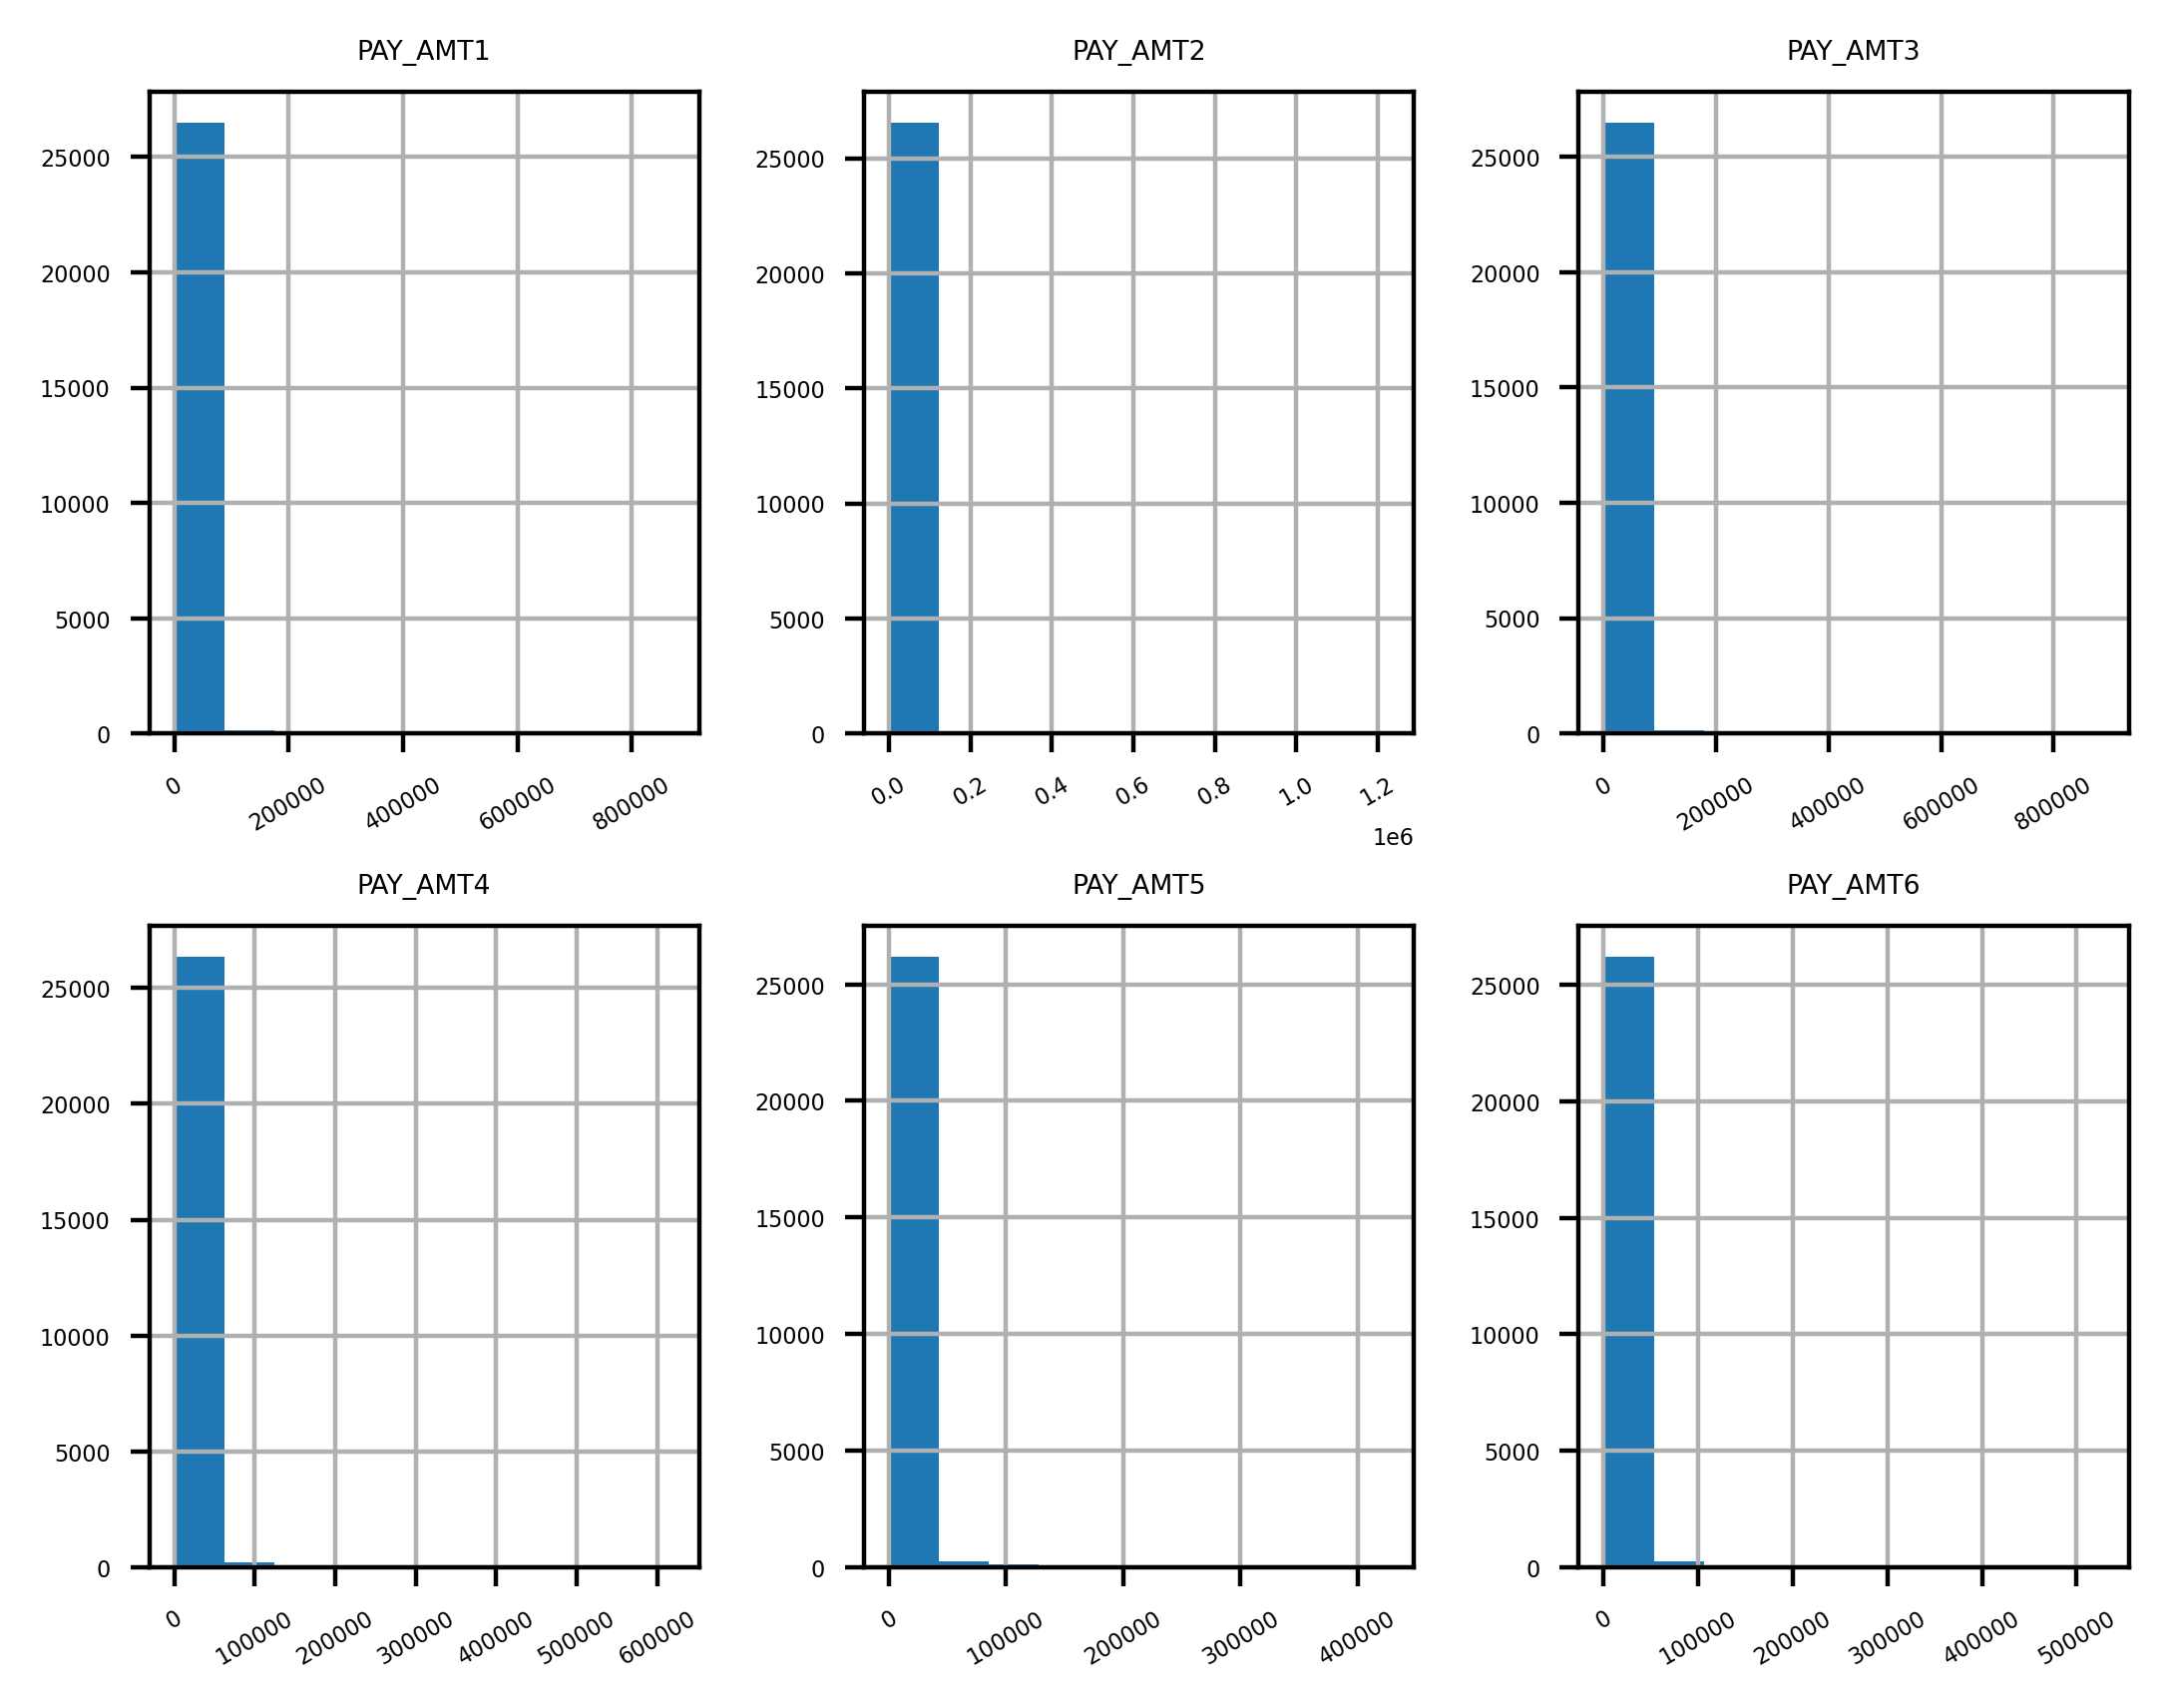

In [23]:
#Histogram of pay amount feature

df[pay_amt_feats].hist(layout=(2,3), xrot=30)

In [24]:
pay_zero_mask = df[pay_amt_feats] == 0 #See how many pay amount features are actually -
pay_zero_mask.head()

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0      True     False      True      True      True      True
1      True     False     False     False      True     False
2     False     False     False     False     False     False
3     False     False     False     False     False     False
4     False     False     False     False     False     False

In [25]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64